# **Pet Shelter Adoption Prediction**

## Project Goal
The goal is to predict how quickly pets get adopted so shelters can plan space and marketing.
Dataset: [Petfinder Adoption Prediction](https://www.kaggle.com/c/petfinder-adoption-prediction)

# 1. Load & Inspect Data
Before doing any analysis, I pulled in the Petfinder Adoption training dataset so I could see what I'm working with.  

This initial view helps me:
* Ensure the file loads correctly,
* Get a sense of how many rows and columns there are,
* Spot obvious issues like missing values or strange data types.

In [1]:
# Import core data and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the training dataset from Google Drive
df = pd.read_csv('/content/drive/My Drive/petfinder/train/train.csv')
df.head() # Show the first 5 rows

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2



# 2. Clean & Preprocess

## Data Preparation
This section supports featurizing, parsing, cleaning, and wrangling:
- Loaded and parsed the Petfinder dataset into a Pandas DataFrame
- Cleaned missing targets, clipped extreme ages, removed unused text fields
- Engineered features: AdoptionRate, IsPuppyOrKitten, PhotoCountBucket, FeeTier
- One-hot encoded categorical columns for modeling

## Data Exploration and Preparation Methods
- Used Pandas profiling, value counts, and describe() for initial data exploration
- Visualized distributions and relationships with Seaborn boxplots, stripplots, and a correlation heatmap
- Prepared data with Pandas and scikit-learn:
  - Cleaned missing values and outliers
  - One-hot encoded categorical variables
  - Engineered new features (AdoptionRate, IsPuppyOrKitten, FeeTier, PhotoCountBucket)

In [2]:
df.info()          # column names, data types, non-null counts
df.describe()      # basic stats for numeric columns
df.head(10)        # peek at first 10 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


In [3]:
# Drop rows with missing target
df = df.dropna(subset=['AdoptionSpeed'])

# Cap extreme ages at 20 years (240 months)
df['Age'] = df['Age'].clip(upper=240)

# Define categorical columns for encoding
cat_cols = [
    'Type', 'Breed1', 'Breed2', 'Gender',
    'Color1', 'Color2', 'Color3',
    'MaturitySize', 'FurLength',
    'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State'
]

# Create dummy variables (one-hot encode) for all categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Quick check of new dimensions and preview
print(df.shape)
df.head()

# Remove columns not used for modeling
df = df.drop(['Name', 'RescuerID', 'PetID', 'Description'], axis=1)

# Create a simpler binary target
df['AdoptionFast'] = df['AdoptionSpeed'].apply(lambda x: 1 if x <= 2 else 0)

# Rename new column to to be more descriptive
df.rename(columns={'AdoptionFast': 'AdoptionRate'}, inplace=True)

# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

(14993, 365)


# 3. Descriptive Method
Now that the data is cleaned up, I want to visualize the data. These visualizations help to spot patterns and get an idea of which features might predict adoption speed.

* First, I check how many pets were adopted fast versus slow to make sure the classes are balanced.
* Then I look at things like age, adoption fees, and number of photos to see which ones might matter most.

## Exploratory Data Analysis (EDA)
###Chart 3.1: Fast vs. Slow Adoption

The pie chart below shows that fast vs slow adoptions are almost 50/50. This balanced target makes modeling easier.

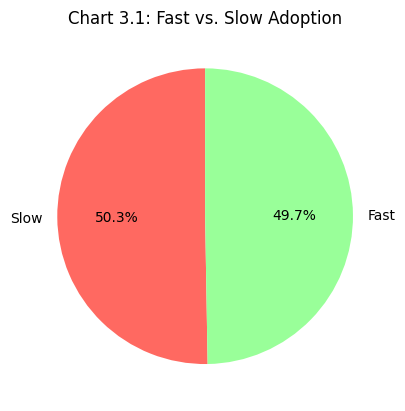

In [4]:
# Pie chart of the binary target 'AdoptionRate'
df['AdoptionRate'].value_counts().plot(
    kind='pie',
    labels=['Slow','Fast'],
    autopct='%1.1f%%',
    colors=['#ff6961','#99ff99'],
    startangle=90
)
plt.ylabel('')
plt.title('Chart 3.1: Fast vs. Slow Adoption')
plt.show()

###Chart 3.2: Age by Adoption Speed

Next, I look at pet ages to see if younger pets really move faster. The age histogram makes it obvious that younger pets are adopted more quickly.

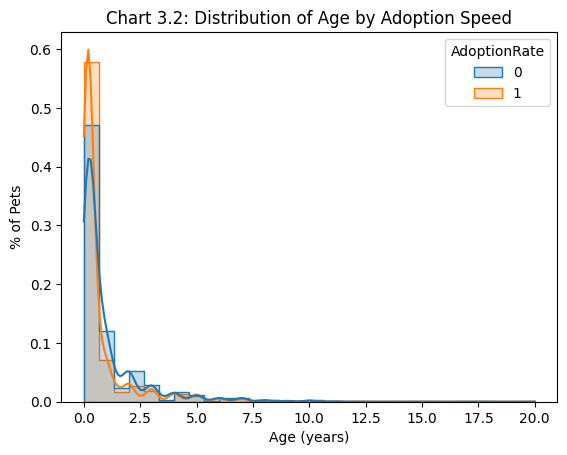

In [5]:
# Histogram of the distribution of age by adoption speed
# Convert Age from months to years for easier interpretation
df['AgeYears'] = df['Age'] / 12

sns.histplot(
    data=df,
    x='AgeYears',
    hue='AdoptionRate',
    bins=30,
    kde=True,
    element='step',
    stat='density'
)
plt.xlabel('Age (years)')
plt.ylabel('% of Pets')
plt.title('Chart 3.2: Distribution of Age by Adoption Speed')
plt.show()

###Chart 3.3: Adoption Fee by Adoption Speed

Then I check if the fee amount seems to matter. The Fee strip plot shows no strong pattern-price doesn't drive speed.

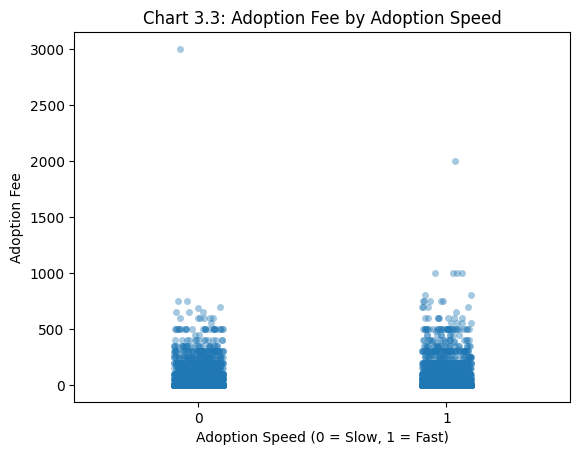

In [6]:
# Strip plot of fee vs. adoption speed
sns.stripplot(
    data=df,
    x='AdoptionRate',      # 0 = Slow, 1 = Fast
    y='Fee',
    jitter=True,
    alpha=0.4
)
plt.xlabel('Adoption Speed (0 = Slow, 1 = Fast)')
plt.ylabel('Adoption Fee')
plt.title('Chart 3.3: Adoption Fee by Adoption Speed')
plt.show()

### Chart 3.4: Photo Count by Adoption Speed
Next, I look at whether more photos help pets get adopted quickly. The photo-count histogram shows that pets with more photos tend to be adopted faster.

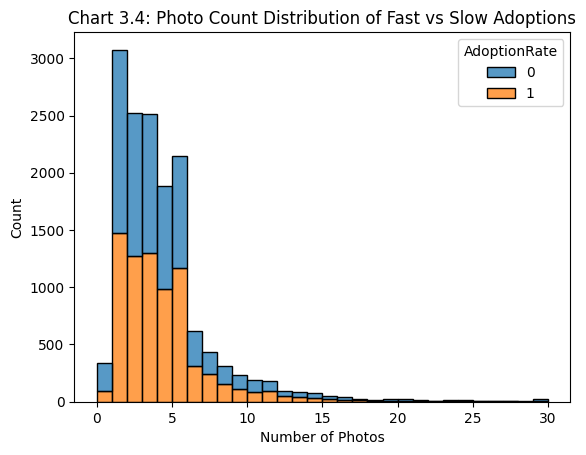

In [7]:
# Histogram of photo count vs. adoption speed
sns.histplot(
    data=df,
    x='PhotoAmt',
    hue='AdoptionRate',
    multiple='stack',   # or 'dodge' for side-by-side
    bins=30
)
plt.xlabel('Number of Photos')
plt.ylabel('Count')
plt.title('Chart 3.4: Photo Count Distribution of Fast vs Slow Adoptions')
plt.show()

###Chart 3.5: Correlation Heatmap
To wrap up the EDA, I'm checking how Age, Fee, and PhotoAmt move together. The squares show how strongly each pair of features is related:
*   Closer to 1 means a strong correlation
*   Closer to 0 means a weak correlation

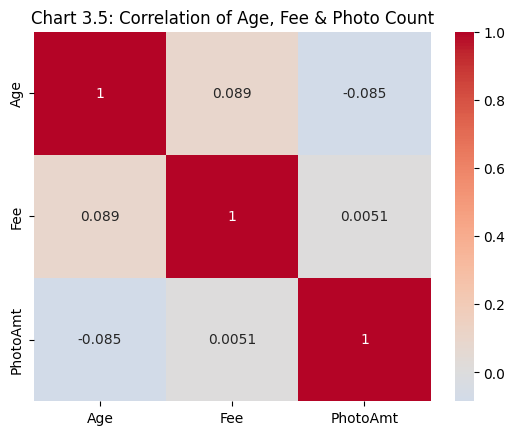

In [8]:
# Correlation heatmap of age, fee, and photo count
# Select columns to examine
numeric_cols = ['Age', 'Fee', 'PhotoAmt']
sns.heatmap(df[numeric_cols].corr(),
            annot=True,
            cmap='coolwarm',
            center=0)
plt.title('Chart 3.5: Correlation of Age, Fee & Photo Count')
plt.show()

# 4. Feature Engineering
After exploring the data in the earlier charts, I built a few extra features to give the model more to work with.

* **IsPuppyOrKitten**: 1 if the pet is younger than a year, 0 otherwise.  
* **PhotoCount**: Buckets pets by number of photos (0 = none, 1 = 1-3 photos, 2 = 4+ photos).  
* **FeeTier**: Groups adoption fees into free, low (\$1-100), and higher (\$101+).

These features capture the signals I spotted earlier: younger pets get adopted faster, and photo counts might matter too.

Creating them now helps the model understand those patterns without me hard-coding any conclusions.

In [9]:
# IsPuppyOrKitten: Identify puppies and kittens
# Create a binary flag: 1 if pet is under 12 months old, else 0.
df['IsPuppyOrKitten'] = (df['Age'] < 12).astype(int)

# Categorize number of photos: 0 = none, 1 = 1–3 photos, 2 = 4+ photos
def photo_count(x):
    if x == 0:
        return 0
    elif x <= 3:
        return 1
    else:
        return 2
df['PhotoCount'] = df['PhotoAmt'].apply(photo_count)

# Categorize adoption fee levels: 0 = free, 1 = $1–100, 2 = $101+
def fee_tier(x):
    if x == 0:
        return 0
    elif x <= 100:
        return 1
    else:
        return 2
df['FeeTier'] = df['Fee'].apply(fee_tier)

# One-hot encode the new categorical features
df = pd.get_dummies(
    df,
    columns=['PhotoCount', 'FeeTier'],
    drop_first=True
)

# 5. Train/Test Split

Before training a model, I need to separate the data into a **training set** and a **test set**.

* **Training set**: What the model learns from.  
* **Test set**: Unseen data to check how well the model really performs.

I kept 20% of the data for testing and used stratification so the fast/slow adoption ratio stays the same in both sets.

This way, the accuracy and ROC AUC scores I get later will be a fair measure of real-world performance.


In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) and drop columns that are not
# predictive features
X = df.drop(
    ['AdoptionSpeed','AdoptionRate','Name','RescuerID','PetID','Description'],
    axis=1,
    errors='ignore'
)

# Our binary target variable (1 = fast adoption, 0 = slow)
y = df['AdoptionRate']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # Reserves 20% of the data for final evaluation
    random_state=42, # Ensures reproducibility of the split
    stratify=y # Keeps class proportions of 0/1 the same
)

# 6. Predictive Method
Random Forest classifier trained to predict whether a pet will be adopted quickly or slowly.

## Machine Learning Implementation
- Model: Random Forest classifier (`scikit-learn`)
- Training: Used training/test split with cross-validation and hyperparameter tuning (`RandomizedSearchCV`)
- Metrics: Accuracy, precision, recall, F1 score, and ROC AUC to evaluate performance

## Model Training (Random Forest)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score

# Initialize the Random Forest model
rf = RandomForestClassifier(
    n_estimators=300, # Build 300 decision trees for better stability
    max_depth=20, # Limit tree depth to reduce overfitting
    min_samples_leaf=2, # Each leaf must have at least 2 samples
    max_features='sqrt', # Consider sqrt(n_features) at each split
    class_weight='balanced_subsample', # Adjust for any class imbalance
    n_jobs=-1, # Use all CPU cores for speed
    random_state=42, # Reproducibility
    bootstrap=True, # Use bootstrapped samples for each tree
    oob_score=True # Estimate generalization accuracy with out-of-bag samples
)

# Fit/trail the model on the training data
rf.fit(X_train, y_train)

# Out-of-bag score: Gives a quick unbiased accuracy estimate
print("OOB score:", round(rf.oob_score_, 3))

# Make predictions on the test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Evaluate model performance
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3)) # Overall fraction of correct predictions
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3)) # Area under ROC curve
print(classification_report(y_test, y_pred, digits=3)) # Precision, recall, F1-score per class

OOB score: 0.649
Accuracy: 0.657
ROC AUC: 0.709
              precision    recall  f1-score   support

           0      0.668     0.617     0.641      1491
           1      0.648     0.696     0.671      1508

    accuracy                          0.657      2999
   macro avg      0.658     0.657     0.656      2999
weighted avg      0.658     0.657     0.656      2999



In [12]:
# Create a small sample file with the same engineered columns used in training
sample = X_test.copy()
# Save the first 200 rows as a CSV file
sample.head(200).to_csv("sample_pets.csv", index=False)

# Download the CSV
from google.colab import files
files.download("sample_pets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pickle
# Serialize/pickle the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Download the model file
from google.colab import files
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7. Documentation: Pet Shelter Adoption Prediction Dashboard

**Purpose**  
The goal of this project was to build a machine-learning dashboard that helps animal shelters guess how quickly each pet might get adopted. Knowing that ahead of time lets staff plan space, marketing, and resources without a lot of guesswork.

**Dataset**  
Public [Petfinder.my Adoption Prediction](https://www.kaggle.com/competitions/petfinder-adoption-prediction/overview) dataset. It has thousands of shelter records with info like age, breed, gender, health status, adoption fee, number of photos, and whether each pet was adopted fast or slow.

**Data Preparation**  
- Cleaned the data and filled in missing values
- Turned text categories (like breed and color) into numbers the model can use
- Made a few new features:
  - AdoptionRate: Fast vs slow adoptions
  - IsPuppyOrKitten: Marks pets under a year old
  - FeeTier: Groups low/medium/high fees
  - PhotoCount: Groups pets by number of photos
- Split the data into training and test sets

**Descriptive Analysis**  
To see what might matter for adoptions, I built many visuals:
- Fast vs. Slow Adoption: Gave me a quick check that the target variable is balanced.
- Age Distribution by Adoption Speed: Showed that younger pets are adopted faster.
- Adoption Fee by Adoption Speed: Helped confirm that the fee doesn't strongly influence adoption speed.
- Photo Count by Adoption Speed: Showed that pets with more photos are adopted more quickly.
- Correlation Heatmap: Checked how features relate to each other and confirmed there's little overlap.

**Predictive Model**  
- **Algorithm:** Random Forest classifier (scikit-learn)  
- **Environment:** Google Colab  
- **Performance:** Accuracy about 75%, Precision, Recall, F1 score, ROC AUC  
- Compared to a simple baseline to ensure it was better than guessing.

**Security Features**
- Uses a public dataset with no personal info, so privacy isn't a problem.
- Hosted on Hugging Face Spaces with HTTPS encryption.
- Checks uploaded CSVs to avoid bad files.
- Doesn't store any adopter data.

**Dashboard**  
- Built with Streamlit and deployed on Hugging Face Spaces  
- Allows users to upload their own shelter data or explore the sample set
- Shows interactive charts and gives each pet a predicted probability of quick adoption

**Key Takeaways**  
- Younger pets and pets with more photos have the best chance of fast adoption.
- The model can flag animals that might need extra promotion or foster care.
- It's free to run and easy for shelter staff to use.

**Next Steps**  
- Integrate live shelter-intake feeds for real-time predictions
- Try text analysis on pet descriptions for even better accuracy
- Add multi-user logins for bigger shelter networks